# Camera Calibration & Correction Images
---

##  Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

### Importing libraries

In [1]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(8,5,0)
# numpy functions behavior
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

In [3]:
# Make a list of calibration images
images = glob.glob('./camera_cal/c*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)


If the above cell ran sucessfully, you should now have `objpoints` and `imgpoints` needed for camera calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

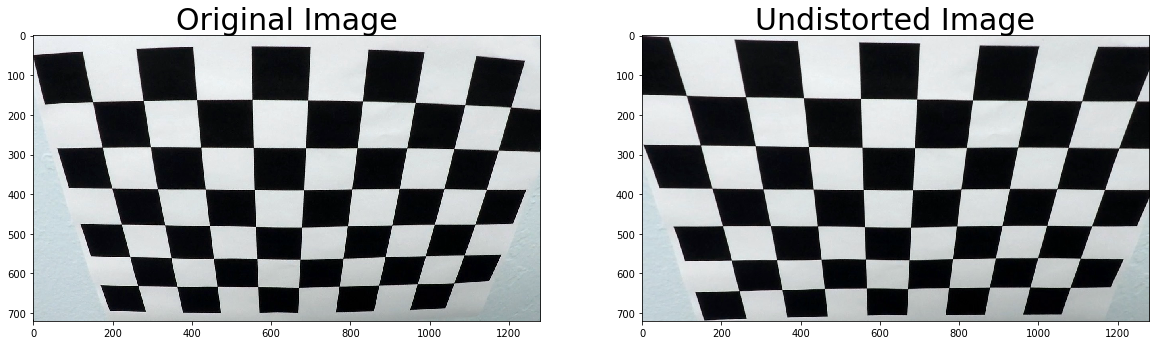

In [4]:


# Test undistortion on an image
img = cv2.imread('./camera_cal/calibration2.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


undist = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('./outputs/test_undist.jpg',undist)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "outputs/camera_calibration.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion

plt.subplots(1, 2, figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Original Image', fontsize=30)
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Undistorted Image', fontsize=30)
plt.imshow(undist)

plt.savefig('./outputs/image_calibrate.png')

## Apply a distortion correction to raw images.

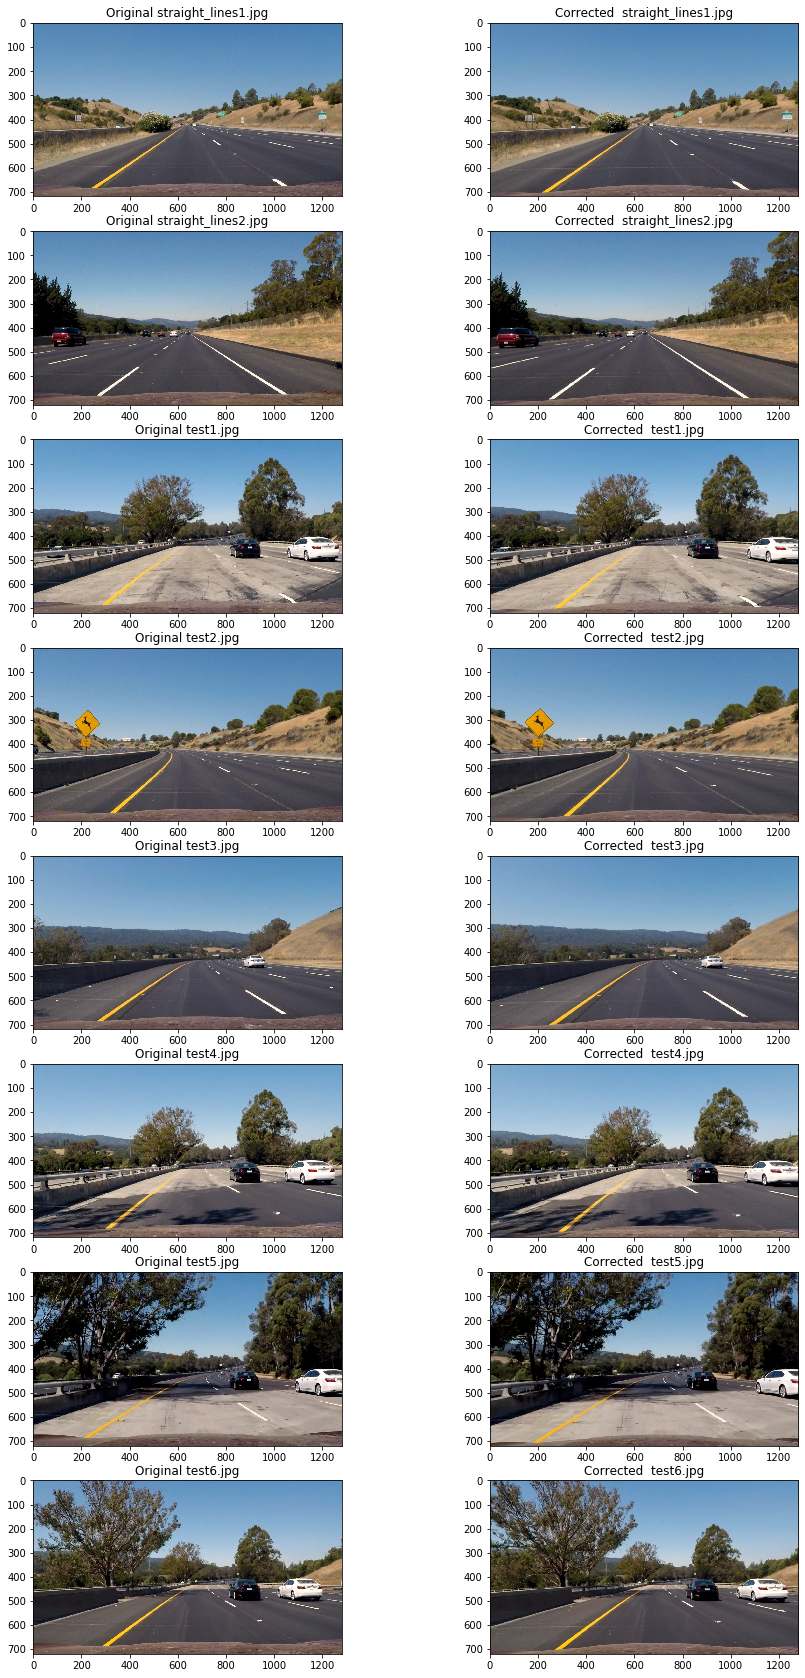

In [5]:
# Load test iamges
test_images = glob.glob('./test_images/*.jpg')
plt.subplots(8, 2, figsize=(15,30))
undists = []
for idx, fname in enumerate(test_images):
    img = cv2.imread(fname)
    plt.subplot(8, 2, (idx*2+1))
    plt.title('Original '+ os.path.basename(fname))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    undist = cv2.cvtColor(undist, cv2.COLOR_BGR2RGB)
    undists.append(undist)
    plt.subplot(8, 2, (idx*2+2))
    plt.title('Corrected  '+ os.path.basename(fname))
    plt.imshow(undist)
plt.show()

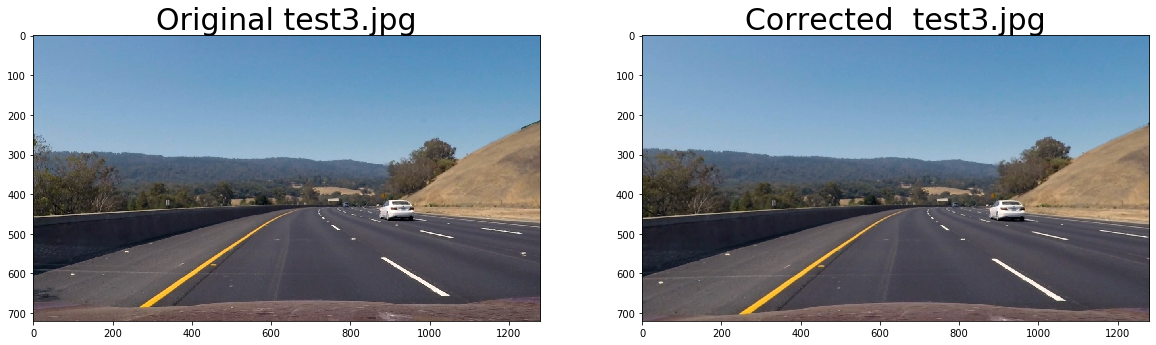

In [6]:
plt.subplots(1,2,figsize=(20,10))
fpath = './test_images/test3.jpg'
img = cv2.imread(fpath)
fname = os.path.basename(fpath)

plt.subplot(1, 2, 1)
plt.title('Original '+ fname, fontsize=30)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.subplot(1, 2, 2)
plt.title('Corrected  '+ fname, fontsize=30)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.savefig('./outputs/image_corrected.png')
plt.show()